<a href="https://colab.research.google.com/github/amitabh16kgpian/Machine-Learning-Projects/blob/main/House_Price_Prediction_using_XGBoost_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the depedencies i.e libraries 

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import sklearn.datasets
import seaborn as sns
from sklearn import metrics ##for model evlaution

Importing the California house price dataset

In [22]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [23]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [24]:
#here datatset contains two arrays i.e data and target also target names

To make above dataset more structured, we use pandas data frame.
Load all the above data into pandas data frame.

In [25]:
house_price_dataframe = pd.DataFrame(house_price_dataset.data , columns=house_price_dataset.feature_names)

In [26]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Add the taget column to the DataFrame

In [27]:
house_price_dataframe['target']=house_price_dataset.target                                                     #house_price_dataset.name_of_array


In [28]:
house_price_dataframe.head(100)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
95,2.0096,36.0,2.294016,1.066294,3469.0,1.493328,37.80,-122.26,1.300
96,2.8345,31.0,3.894915,1.127966,2048.0,1.735593,37.82,-122.26,1.838
97,2.0062,29.0,3.681319,1.175824,202.0,2.219780,37.81,-122.26,1.250
98,1.2185,22.0,2.945600,1.016000,2024.0,1.619200,37.82,-122.26,1.700


In [29]:
#checking the number of rows and column in the data frame
house_price_dataframe.shape

(20640, 9)

In [35]:
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Checking the data frame for Missing values

In [30]:
#checking missing values in each column
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

Finding correlatin between all features using heat map.

There are two types of correlation :
1.Positive Correlation    i.e directly proportional relation 
2.Negative Correlation    i.e inversely proportional relation

In [33]:
correlation = house_price_dataframe.corr()

<Axes: >

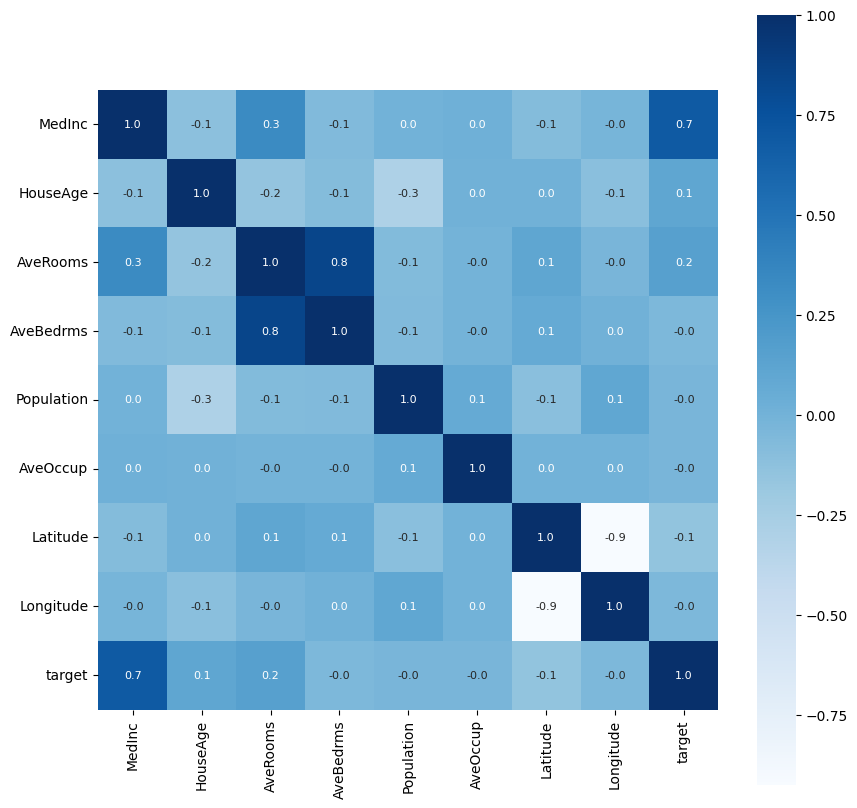

In [34]:
#constructing a heat map to understand the correlation
plt.figure(figsize =(10,10))
sns.heatmap(correlation , cbar=True,square = True,fmt='.1f',annot =True, annot_kws={'size':8},cmap='Blues')                     #cbar = color bar , fmt = floating point kitna decimal tak,annot = annotations written on axis, cmap = color of heat map 

Splitting the dataframe into data and target

In [38]:
X = house_price_dataframe.drop(['target'],axis =1)
Y = house_price_dataframe['target']

In [39]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0      8.3252      41.0  6.984127  ...  2.555556     37.88    -122.23
1      8.3014      21.0  6.238137  ...  2.109842     37.86    -122.22
2      7.2574      52.0  8.288136  ...  2.802260     37.85    -122.24
3      5.6431      52.0  5.817352  ...  2.547945     37.85    -122.25
4      3.8462      52.0  6.281853  ...  2.181467     37.85    -122.25
...       ...       ...       ...  ...       ...       ...        ...
20635  1.5603      25.0  5.045455  ...  2.560606     39.48    -121.09
20636  2.5568      18.0  6.114035  ...  3.122807     39.49    -121.21
20637  1.7000      17.0  5.205543  ...  2.325635     39.43    -121.22
20638  1.8672      18.0  5.329513  ...  2.123209     39.43    -121.32
20639  2.3886      16.0  5.254717  ...  2.616981     39.37    -121.24

[20640 rows x 8 columns]
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923

Splitting the dataframe into Training data and Test data

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=2)

In [41]:
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Defining the Model (XGBoost Regression Model)

In [42]:
model = XGBRegressor()

Training the Model (i.e fitting)

In [43]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Predition on Training Data

In [44]:
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

[0.6893792  2.986824   0.48874274 ... 1.8632544  1.7800125  0.7565893 ]


In [45]:
#accuracy for prediction on training data
#R squared error
score_1 = metrics.r2_score(Y_train,training_data_prediction)
#Mean Absolute error
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)

print("R Squared error : ",score_1)
print("Mean absolute error:",score_2)


R Squared error :  0.9451221492760822
Mean absolute error: 0.1919170860794262


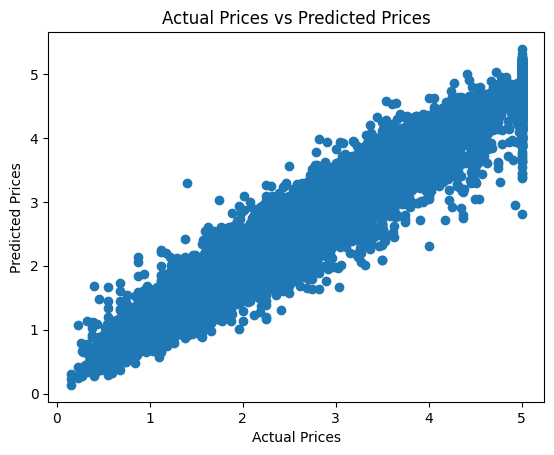

In [48]:
#Visualizing the actual prices and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

Prediction on Test Data

In [46]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[2.787383  1.9628428 0.782536  ... 1.5060123 0.8763797 1.9317917]


In [47]:
#accuracy for prediction on test data
#R squared error
score_1t = metrics.r2_score(Y_test,test_data_prediction)
#Mean Absolute error
score_2t = metrics.mean_absolute_error(Y_test,test_data_prediction)

print("R Squared error : ",score_1t)
print("Mean absolute error:",score_2t)

R Squared error :  0.8412904408180302
Mean absolute error: 0.30753655785801337


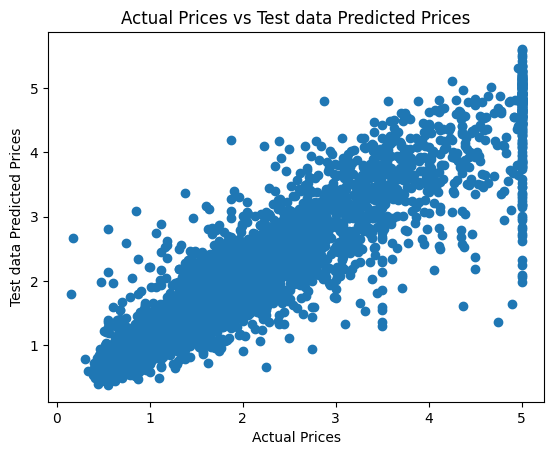

In [50]:
#Visualizing the actual prices and predicted prices
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Test data Predicted Prices')
plt.title('Actual Prices vs Test data Predicted Prices')
plt.show()